# Injuries While Driving in Montgomery County, Maryland

###### By Derek Lilienthal and Ritik Sirsikar

# Introduction

In this project, we explored a real world data set of Montgonery County's crash reports. This dataset consists of only the most recent 1000 reported crashes from the time the dataset was archived. (October 13th, 2020). This data set includes variable like the date/time of incident, speed limit of the road where the crash occured, type of accident reported, injuries reported, weather conditions, etc. With 43 different observations to explore within the dataset, we narrowed our exploration to revolve around the the speed limits on the roads where the accidents occured, the type of injuries inflicted by the crash, the time/days that the accidents occured at, and the days of the week where there are the most reported crashes. 

Data used in this report comes from https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632. This is Montgomery County, Maryland's official website. 

In [1]:
# Import all the libraries we will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# View the max columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Make all graphs 20x10
plt.rcParams['figure.figsize'] = (20.0, 10.0)
# Make all the fonts on the graphs larger
plt.rcParams.update({'font.size': 22})
# Make all the seaborn graphs grids
sns.set_style("whitegrid")

In [2]:
# Import our data
df = pd.read_csv('https://raw.githubusercontent.com/dblilienthal/CSV_Files/main/data.csv')

# Initial Data Exploration

Lets look at how large this dataset is.

In [3]:
df.shape

(1000, 43)

1000 rows and 43 columns.

In [4]:
# Take a look at some of the data in the dataframe
df.head()

,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,off_road_description,municipality,related_non_motorist,collision_type,weather,surface_condition,light,traffic_control,driver_substance_abuse,non_motorist_substance_abuse,person_id,driver_at_fault,injury_severity,circumstance,driver_distracted_by,drivers_license_state,vehicle_id,vehicle_damage_extent,vehicle_first_impact_location,vehicle_second_impact_location,vehicle_body_type,vehicle_movement,vehicle_continuing_dir,vehicle_going_dir,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,geolocation
0,DD56150097,200039625,Rockville Police Departme,Property Damage Crash,2020-10-08T12:51:00.000,Maryland (State),HUNGERFORD DR,Municipality,FREDERICK AVE #2,NaN,ROCKVILLE,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,F6D9BCA5-9AE9-490A-A9AF-00DC3ECB437B,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,09BD170E-B134-49E2-BC57-F1CF6C5C7CEC,DISABLING,SIX OCLOCK,UNDERSIDE,MOTORCYCLE,SLOWING OR STOPPING,North,North,35,No,No,2017,YAMAHA,BOLT,NO MISUSE,39.092261,-77.153044,"\n, \n(39.09226138, -77.15304406)"
1,DD56150097,200039625,Rockville Police Departme,Property Damage Crash,2020-10-08T12:51:00.000,Maryland (State),HUNGERFORD DR,Municipality,FREDERICK AVE #2,NaN,ROCKVILLE,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,BC5CB81E-E0CC-4444-9003-DAEF8D5085DB,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,2E1A66DE-8EBA-4462-8BF3-9591E43438F8,DISABLING,TWO OCLOCK,TWELVE OCLOCK,MOTORCYCLE,MOVING CONSTANT SPEED,North,North,35,No,No,2018,HONDA,CP650F,NaN,39.092261,-77.153044,"\n, \n(39.09226138, -77.15304406)"
2,MCP158000D9,200039599,Montgomery County Police,Injury Crash,2020-10-08T07:35:00.000,Maryland (State),CLOPPER RD,Municipality,PHEASANT RUN DR,NaN,GAITHERSBURG,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,19AE937B-4239-4B6F-AD8A-6CBCCDE554FC,No,POSSIBLE INJURY,"N/A, VISION OBSTRUCTION (INCL. BLINDED BY SUN)",NOT DISTRACTED,MD,68F17606-97AA-4FC5-939B-9E01373208E0,DISABLING,THREE OCLOCK,THREE OCLOCK,(SPORT) UTILITY VEHICLE,MOVING CONSTANT SPEED,South,South,40,No,No,2013,TOYT,RAV4,NO MISUSE,39.147255,-77.232997,"\n, \n(39.147255, -77.23299667)"
3,MCP158000D9,200039599,Montgomery County Police,Injury Crash,2020-10-08T07:35:00.000,Maryland (State),CLOPPER RD,Municipality,PHEASANT RUN DR,NaN,GAITHERSBURG,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,29D79F16-A6A8-4D0E-BEF1-EAC5BCB05E1B,Yes,NO APPARENT INJURY,"N/A, VISION OBSTRUCTION (INCL. BLINDED BY SUN)",UNKNOWN,MD,99622570-CFEB-4AD9-A526-ECA6CCF8A6E2,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,MOVING CONSTANT SPEED,East,East,40,No,No,2019,KIA,SORENTO,NO MISUSE,39.147255,-77.232997,"\n, \n(39.147255, -77.23299667)"
4,MCP3071001R,200039581,Montgomery County Police,Property Damage Crash,2020-10-07T23:51:00.000,County,SCENERY DR,County,BRANDERMILL DR,NaN,NaN,NaN,OTHER,CLEAR,DRY,DARK LIGHTS ON,NaN,ALCOHOL PRESENT,NaN,445FC6AB-9FD2-4C61-BD24-E07EF739960C,Yes,NO APPARENT INJURY,NaN,OTHER DISTRACTION,MD,9057EFF9-0935-4167-BDB5-9EDC8E820550,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,East,East,30,No,No,2014,HYUN,4S,NO MISUSE,39.191533,-77.233590,"\n, \n(39.19153333, -77.23359)"


In [5]:
df.describe().round(decimals=2)

,local_case_number,speed_limit,vehicle_year,latitude,longitude
count,1.000000e+03,1000.00,1000.00,1000.00,1000.00
mean,1.966167e+08,32.47,1959.04,39.09,-77.12
std,2.459026e+07,11.22,320.31,0.07,0.10
min,2.000218e+07,0.00,0.00,38.80,-77.47
25%,2.000361e+08,30.00,2007.00,39.04,-77.20
50%,2.000372e+08,35.00,2013.00,39.08,-77.12
75%,2.000382e+08,40.00,2016.00,39.14,-77.04
max,2.000396e+08,60.00,2021.00,39.32,-76.93


###### Take a look at the dataset as whole

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   report_number                   1000 non-null   object 
 1   local_case_number               1000 non-null   int64  
 2   agency_name                     1000 non-null   object 
 3   acrs_report_type                1000 non-null   object 
 4   crash_date_time                 1000 non-null   object 
 5   route_type                      903 non-null    object 
 6   road_name                       906 non-null    object 
 7   cross_street_type               903 non-null    object 
 8   cross_street_name               906 non-null    object 
 9   off_road_description            94 non-null     object 
 10  municipality                    130 non-null    object 
 11  related_non_motorist            47 non-null     object 
 12  collision_type                  997

### Lets convert the datatypes from objects into strings, integers, or floats

In [7]:
df = df.convert_dtypes()

##### Lets make sure the conversion worked

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   report_number                   1000 non-null   string 
 1   local_case_number               1000 non-null   Int64  
 2   agency_name                     1000 non-null   string 
 3   acrs_report_type                1000 non-null   string 
 4   crash_date_time                 1000 non-null   string 
 5   route_type                      903 non-null    string 
 6   road_name                       906 non-null    string 
 7   cross_street_type               903 non-null    string 
 8   cross_street_name               906 non-null    string 
 9   off_road_description            94 non-null     string 
 10  municipality                    130 non-null    string 
 11  related_non_motorist            47 non-null     string 
 12  collision_type                  997

Now that we've explored the dataset and have an understanding of the variables we have, lets start cleaning the dataset from null and bad values

# Data Cleaning and Preprocessing

In order for us to explore accidents based on date and time, we need to format the 'crash_date_time' column into a sperate columns for time of accident, the hour of the accident, date, and day of the week.

In [9]:
#2020-10-08T12:51:00.000
def date_fix(d):
    date = d[:10]
    return date

def time_fix(t):
    time = t[11:19]
    return time

# Add the crash time and date to the dataset
df['crash_time'] = df['crash_date_time'].apply(time_fix)
df['crash_date'] = df['crash_date_time'].apply(date_fix)
del df['crash_date_time']

# Add in the day of the week
def add_day_of_week(d):
  d = str(d)
  day = pd.Timestamp(d).day_name()
  return day;

# Add day of the week to the dataset
df['day_of_week'] = df['crash_date'].apply(add_day_of_week)

def hour_of_accident(t):
  hour = t[:2]
  return int(hour)

# Add the hour the accident happened to the dataset
df['hour_of_accident'] = df['crash_time'].apply(hour_of_accident)

Now that we've modified the dataframe, lets take a look at the new columns we added

In [10]:
df[['crash_time','crash_date','day_of_week','hour_of_accident']].head(10)

,crash_time,crash_date,day_of_week,hour_of_accident
0,12:51:00,2020-10-08,Thursday,12
1,12:51:00,2020-10-08,Thursday,12
2,07:35:00,2020-10-08,Thursday,7
3,07:35:00,2020-10-08,Thursday,7
4,23:51:00,2020-10-07,Wednesday,23
5,20:20:00,2020-10-07,Wednesday,20
6,17:16:00,2020-10-07,Wednesday,17
7,17:16:00,2020-10-07,Wednesday,17
8,12:34:00,2020-10-07,Wednesday,12
9,12:34:00,2020-10-07,Wednesday,12


## Identifying the missing data

The first thing that we did was to look at the portions of data that is missing for each column in our dataframe

In [11]:
df.isna().mean()

report_number                     0.000
local_case_number                 0.000
agency_name                       0.000
acrs_report_type                  0.000
route_type                        0.097
road_name                         0.094
cross_street_type                 0.097
cross_street_name                 0.094
off_road_description              0.906
municipality                      0.870
related_non_motorist              0.953
collision_type                    0.003
weather                           0.079
surface_condition                 0.120
light                             0.009
traffic_control                   0.148
driver_substance_abuse            0.126
non_motorist_substance_abuse      0.965
person_id                         0.000
driver_at_fault                   0.000
injury_severity                   0.000
circumstance                      0.840
driver_distracted_by              0.000
drivers_license_state             0.065
vehicle_id                        0.000


This shows us all columns that contain missing/null data

##### Fraction of nan values by row
Note: We limited the results by only 10

In [12]:
df.isna().mean(axis = 1).head(10)

0    0.086957
1    0.108696
2    0.065217
3    0.065217
4    0.130435
5    0.217391
6    0.108696
7    0.108696
8    0.152174
9    0.130435
dtype: float64

It looks like there is a good portion of data within the dataset that is null.

In [13]:
df.isna().mean(axis = 1).mean()

0.12384782608695652

On average, it looks like the average row contains around %12 of null data

### Lets take a look at some of the columns that have null values

In [14]:
df.isna().sum()

report_number                       0
local_case_number                   0
agency_name                         0
acrs_report_type                    0
route_type                         97
road_name                          94
cross_street_type                  97
cross_street_name                  94
off_road_description              906
municipality                      870
related_non_motorist              953
collision_type                      3
weather                            79
surface_condition                 120
light                               9
traffic_control                   148
driver_substance_abuse            126
non_motorist_substance_abuse      965
person_id                           0
driver_at_fault                     0
injury_severity                     0
circumstance                      840
driver_distracted_by                0
drivers_license_state              65
vehicle_id                          0
vehicle_damage_extent               2
vehicle_firs

### How many null values are in the dataset?

In [15]:
df.isna().sum().sum()

5697

### Lets get a list of the columns that contain null values so we know what we should look into potentially dropping

In [16]:
df.columns[df.isnull().any()].tolist()

['route_type',
 'road_name',
 'cross_street_type',
 'cross_street_name',
 'off_road_description',
 'municipality',
 'related_non_motorist',
 'collision_type',
 'weather',
 'surface_condition',
 'light',
 'traffic_control',
 'driver_substance_abuse',
 'non_motorist_substance_abuse',
 'circumstance',
 'drivers_license_state',
 'vehicle_damage_extent',
 'vehicle_body_type',
 'vehicle_movement',
 'vehicle_continuing_dir',
 'vehicle_going_dir',
 'equipment_problems']

### Drop some columns that are not useful for our report

When deciding which columns we wanted to drop, we considered a couple of different things like:
1. How useful is this data? In something like the report_number or local_case_number columns, each one of those columns contained only unique values. This ment that there would be no correlations that we could make with those columns.
2. How much unique data is too unique? In something like the cross_street_name, there were hundreds of different streets within the dataset. There were of course some streets that had more accidents on than others. But because there were so many streets to look at, it was just not feasable to consider the cross street as something that might provide useful insights. 
3. How much data is missing? In something like the non_motorist_substance_abuse or circumstance, it would have been nice to have those columns not contain null or missing data. But because they both contained a substantial amount of missing data, it was also not reasonable to consider compairing those columns against other columns. If we had a dataset of maybe 10,000 or 100,000 accidents, then we might have had enough data to do something with those coumns. 

Of course we could make the case for every colunm we dropped and why, but all the columns we decided to drop fit underneath those three things we considered as a filtering method. 

In [17]:
df = df.drop(columns="report_number")
df = df.drop(columns="local_case_number")
df = df.drop(columns="cross_street_name")
df = df.drop(columns="off_road_description")
df = df.drop(columns="related_non_motorist")
df = df.drop(columns="person_id")
df = df.drop(columns="circumstance")
df = df.drop(columns="vehicle_id")
df = df.drop(columns="drivers_license_state")
df = df.drop(columns="vehicle_continuing_dir")
df = df.drop(columns="vehicle_going_dir")
df = df.drop(columns="driverless_vehicle")
df = df.drop(columns="parked_vehicle")
df = df.drop(columns="vehicle_year")
df = df.drop(columns="vehicle_make")
df = df.drop(columns="vehicle_model")
df = df.drop(columns="equipment_problems")
df = df.drop(columns="non_motorist_substance_abuse")
df = df.drop(columns="municipality")

What are the columns that still have null values?

In [18]:
pd.Series(df.columns[df.isna().mean() > 0])

0                 route_type
1                  road_name
2          cross_street_type
3             collision_type
4                    weather
5          surface_condition
6                      light
7            traffic_control
8     driver_substance_abuse
9      vehicle_damage_extent
10         vehicle_body_type
11          vehicle_movement
dtype: object

##### Lets look into the columns that have null values to see if there is anything we would want to drop

In [19]:
for col in df.columns[df.isnull().any()].tolist():
    print(df[col].value_counts(dropna=False))
    print("\n")

Maryland (State)        471
County                  289
NaN                      97
Municipality             69
US (State)               42
Interstate (State)       16
Other Public Roadway     11
Ramp                      5
Name: route_type, dtype: Int64


NaN                                       94
GEORGIA AVE                               66
NEW HAMPSHIRE AVE                         40
FREDERICK RD                              34
ROCKVILLE PIKE                            33
CONNECTICUT AVE                           32
RANDOLPH RD                               23
VEIRS MILL RD                             23
COLUMBIA PIKE                             23
PINEY BRANCH RD                           21
CLOPPER RD                                19
COLESVILLE RD                             18
SHADY GROVE RD                            18
GREAT SENECA HWY                          15
MIDDLEBROOK RD                            14
UNIVERSITY BLVD W                         14
NORBECK RD             

###### Lets replace those null values with something other than null and NaN

In [20]:
df['route_type'].replace(np.nan, 'Not Reported', inplace=True)
df['road_name'].replace(np.nan, 'Not Reported', inplace=True)
df['cross_street_type'].replace(np.nan, 'Unknown', inplace=True)
df['collision_type'].replace(np.nan, 'UNKNOWN', inplace=True)
df['weather'].replace(np.nan, 'UNKNOWN', inplace=True)
df['surface_condition'].replace(np.nan, 'UNKNOWN', inplace=True)
df['light'].replace(np.nan, 'UNKNOWN', inplace=True)
df['traffic_control'].replace(np.nan, 'UNKNOWN', inplace=True)
df['driver_substance_abuse'].replace(np.nan, 'UNKNOWN', inplace=True)
df['vehicle_damage_extent'].replace(np.nan, 'UNKNOWN', inplace=True)
df['vehicle_body_type'].replace(np.nan, 'UNKNOWN', inplace=True)
df['vehicle_movement'].replace(np.nan, 'UNKNOWN', inplace=True)

Because we are not going to be looking at any of these variables within our report, instead of dropping these rows, we will replace each observation that is missing data with either 'Unknown' or 'Not Reported' so we are able to preserve the data we are interested in looking at. 

Lets take a look now to see what the null values looks like:

In [21]:
df.isna().sum().sum()

0

###### What are the new columns for the dataframe?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   agency_name                     1000 non-null   string 
 1   acrs_report_type                1000 non-null   string 
 2   route_type                      1000 non-null   string 
 3   road_name                       1000 non-null   string 
 4   cross_street_type               1000 non-null   string 
 5   collision_type                  1000 non-null   string 
 6   weather                         1000 non-null   string 
 7   surface_condition               1000 non-null   string 
 8   light                           1000 non-null   string 
 9   traffic_control                 1000 non-null   string 
 10  driver_substance_abuse          1000 non-null   string 
 11  driver_at_fault                 1000 non-null   string 
 12  injury_severity                 100

We now can see that we no longer have any null values within our dataframe. Lets now move onto exploring the data and creating visualizations

# Data Exploration and Visualization

### Look up to see if there is any easy correlations between things

In [23]:
df.corr()

,speed_limit,latitude,longitude,hour_of_accident
speed_limit,1.000000,0.098722,0.019613,-0.009120
latitude,0.098722,1.000000,-0.691755,-0.032486
longitude,0.019613,-0.691755,1.000000,0.073832
hour_of_accident,-0.009120,-0.032486,0.073832,1.000000


Because most of the dataset is categorical data, there are no correlations that wil provide any useful insight. 

## What are the unique values for each column? (Except for the locations)

The first thing that we looked at was trying to see how many unique values there are in the dataset after cleaning and what those values are.

### Finding unique values and bad data

Lets look at how many unique discrete values there are.

In [24]:
df_no_nums = df.select_dtypes(exclude='number')
df_no_nums.apply(lambda x : len(x.unique()))

agency_name                         5
acrs_report_type                    3
route_type                          8
road_name                         212
cross_street_type                   9
collision_type                     17
weather                             6
surface_condition                   3
light                               8
traffic_control                     9
driver_substance_abuse              9
driver_at_fault                     3
injury_severity                     5
driver_distracted_by               13
vehicle_damage_extent               6
vehicle_first_impact_location      16
vehicle_second_impact_location     16
vehicle_body_type                  22
vehicle_movement                   20
geolocation                       590
crash_time                        415
crash_date                         32
day_of_week                         7
dtype: int64

Now lets look at how many distinct numeric values there are.

In [25]:
df_no_nums = df.select_dtypes(include='number')
df_no_nums.apply(lambda x : len(x.unique()))

speed_limit          13
latitude            590
longitude           590
hour_of_accident     24
dtype: int64

We can see from above that some columns have a lot of unique values. We are generally going to want to say away from so many unique values in this report because it will be difficult to quantify some of the unqiueness of indivudual pieces of data.

### List of all the unique values for each column in the dataframe

Note: 
We are excluding looking at the columns: latitude, longitude, geolocation, road_name, crash_time, crash_date because of the large number of unique values are in each column

In [26]:
for col in df:
    if not ((col == 'latitude') | (col == 'longitude') | (col == 'geolocation') | (col == 'road_name') | (col == 'crash_time') | (col == 'crash_date')):
        print(df[col].value_counts(dropna=False))
        print("\n")

Montgomery County Police     844
Rockville Police Departme     93
Gaithersburg Police Depar     27
Takoma Park Police Depart     24
Maryland-National Capital     12
Name: agency_name, dtype: Int64


Property Damage Crash    625
Injury Crash             373
Fatal Crash                2
Name: acrs_report_type, dtype: Int64


Maryland (State)        471
County                  289
Not Reported             97
Municipality             69
US (State)               42
Interstate (State)       16
Other Public Roadway     11
Ramp                      5
Name: route_type, dtype: Int64


County                  478
Unknown                 168
Maryland (State)        143
Municipality            130
Other Public Roadway     36
Ramp                     26
US (State)                8
Government                6
Interstate (State)        5
Name: cross_street_type, dtype: Int64


SAME DIR REAR END               273
STRAIGHT MOVEMENT ANGLE         233
OTHER                           128
SINGLE VEHICLE    

Now that we can see some of the unique values in our dataset, we can now pick and choose which variables we may want to look at and compare.

Lets start with some general questions to see if we can find anything we would want to explore more.

## What are drivers most distracted by?

In [27]:
df['driver_distracted_by'].value_counts(normalize=True).round(decimals=2)

NOT DISTRACTED                                       0.60
UNKNOWN                                              0.17
LOOKED BUT DID NOT SEE                               0.15
OTHER DISTRACTION                                    0.03
INATTENTIVE OR LOST IN THOUGHT                       0.03
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT         0.01
TALKING OR LISTENING TO CELLULAR PHONE               0.00
OTHER CELLULAR PHONE RELATED                         0.00
OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)    0.00
ADJUSTING AUDIO AND OR CLIMATE CONTROLS              0.00
BY OTHER OCCUPANTS                                   0.00
NO DRIVER PRESENT                                    0.00
SMOKING RELATED                                      0.00
Name: driver_distracted_by, dtype: float64

###### It looks like 60% of drivers are not distracted, 17% were not reported, 15% Looked but did not see.

With the majority of drivers getting into accidents not being distracted or not being reported, we do don't need to look into distraction.

Lets start looking at the speed limit at which accidents occured at.

## What are the number of accidents that happen by speed limit?

Text(0, 0.5, 'Count')

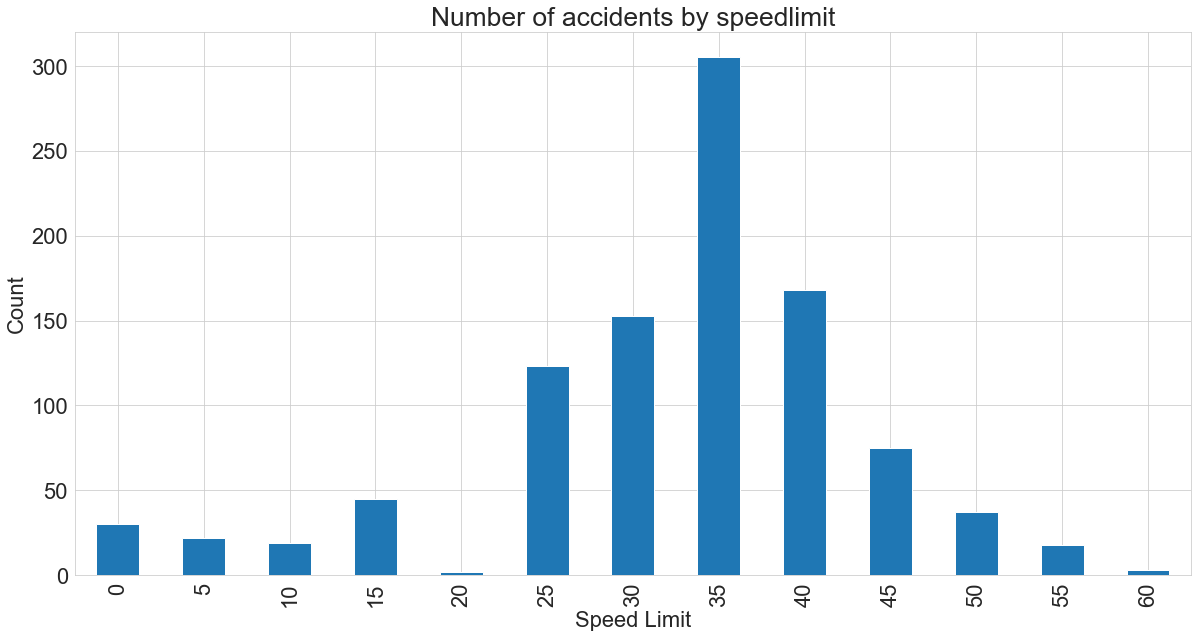

In [28]:
df.groupby(['speed_limit'])['speed_limit'].count().plot.bar()
#pd.crosstab(df['speed_limit'], normalize=True).plot.bar()
plt.title('Number of accidents by speedlimit')
plt.xlabel('Speed Limit')
plt.ylabel('Count')

Same graph but now normalized

Text(0, 0.5, 'Percentage')

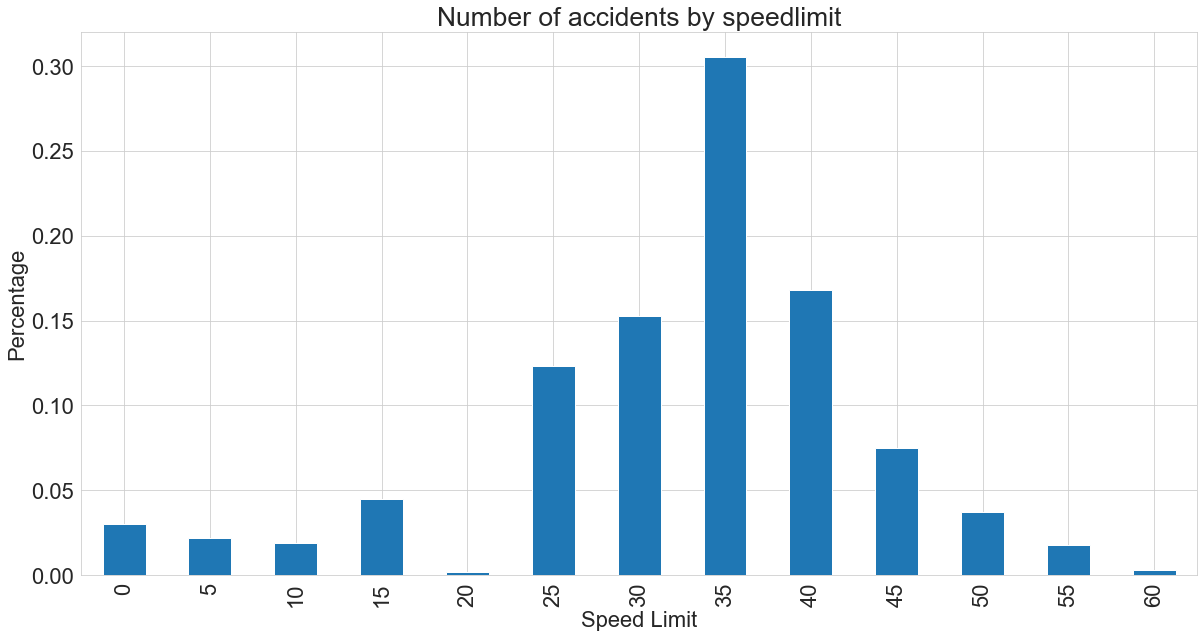

In [29]:
x = df.groupby(['speed_limit'])['speed_limit'].count()
x.div(df.groupby(['speed_limit'])['speed_limit'].count().sum()).plot.bar()

plt.title('Number of accidents by speedlimit')
plt.xlabel('Speed Limit')
plt.ylabel('Percentage')

From our exploration, the majority of accidents happen at the speed limit of 35 MPH. This is a really unique find and worth looking into. We will be exploring more into the kind of incidents that happen when the speed limit is 35 MPH.

##### What are the portion of accidents that happen when the speed limit is 35?

In [30]:
number_of_accidents_35 = df[df['speed_limit'] == 35].shape[0]
number_of_total_accidents = df.shape[0]
portion_of_accidents = number_of_accidents_35 / number_of_total_accidents
portion_of_accidents
# (df['speed_limit'] == 35).mean()

0.305

Around 31% of the accidents in our dataset happen when the speed limit is 35 MPH.

## What are the differences between the type of  accident reported and the speed limit?

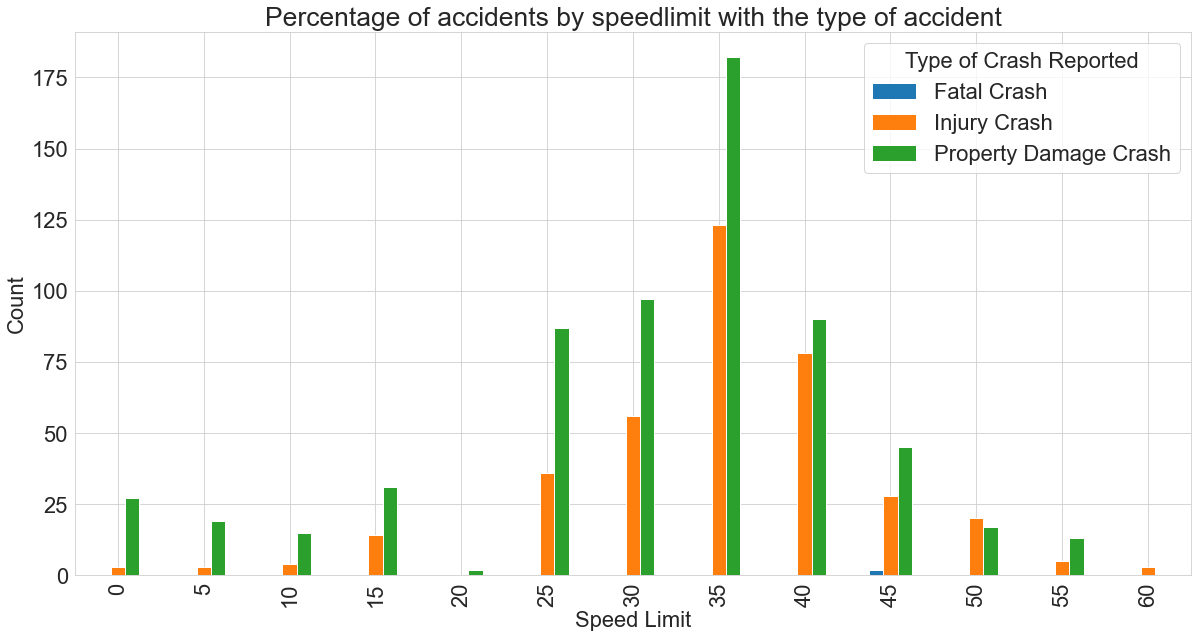

In [31]:
pd.crosstab(df['speed_limit'],df['acrs_report_type']).plot.bar()
plt.title('Percentage of accidents by speedlimit with the type of accident')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.legend(title='Type of Crash Reported')

It looks like a large portion of the accidents that happened when the speed limit is 35 MPH only involve property damage, but there are still a lot of incidents where there was an injury.

It is also worth noting that the only reported fatalities happened at 45 MPH and that there is almost no data at 20 MPH.

### What are the most common types of accidents at where the speed limit is 35 MPH?

In [32]:
df['acrs_report_type'].where(df['speed_limit'] == 35).dropna().value_counts()

Property Damage Crash    182
Injury Crash             123
Name: acrs_report_type, dtype: Int64

It looks like there are actually a lot crashes that involve injuries when the speed limit is 35 MPH

### What is the most common type of damage done each hour where the speed limit is 35?

Lets try to explore more variables to compare when the speed limit is 35 MPH

Text(0, 0.5, 'Count')

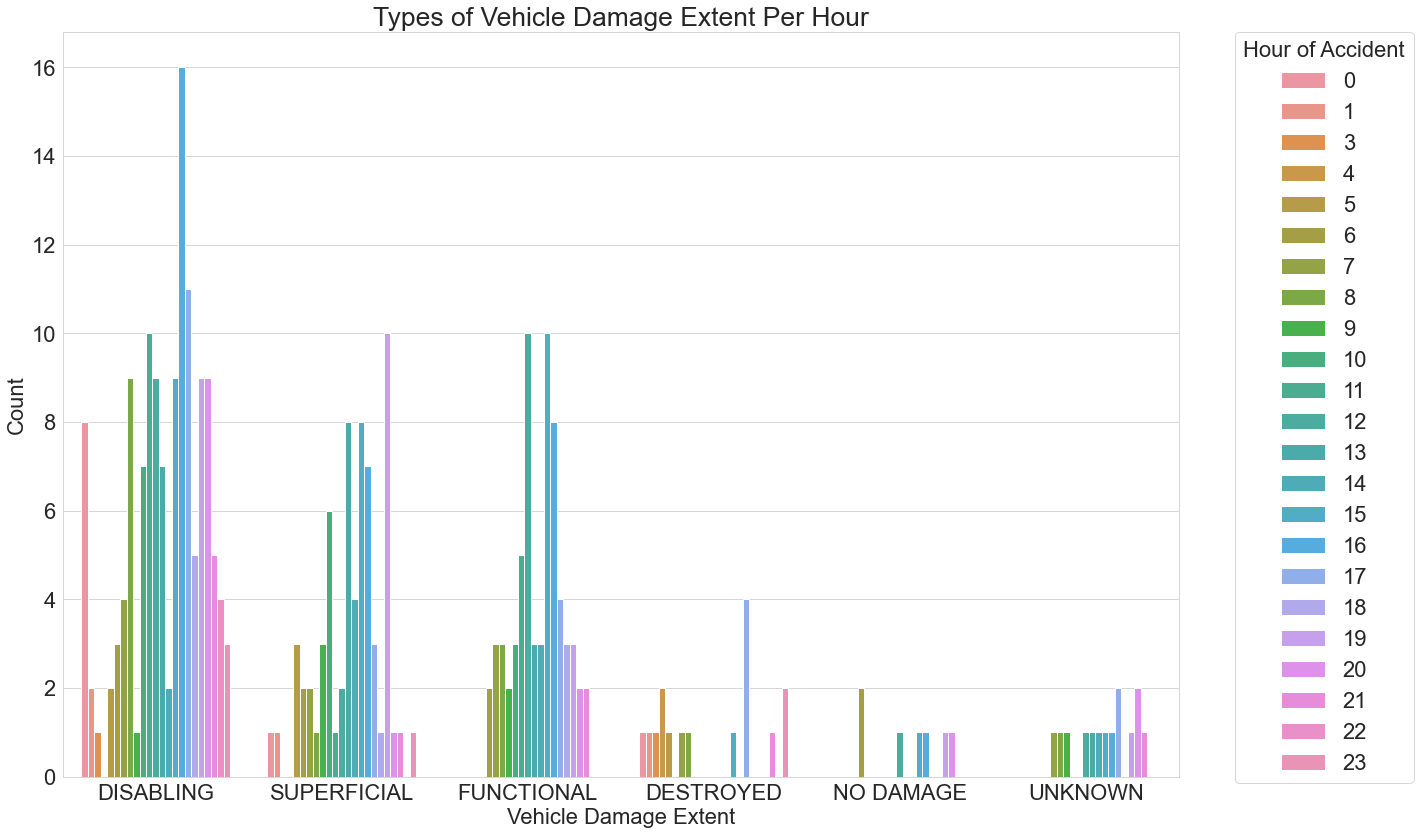

In [33]:
df_speedlimit_35 = df[df['speed_limit'] == 35].reset_index()
plt.figure(figsize=(20,13.7))
ax = sns.countplot(x='vehicle_damage_extent', hue='hour_of_accident', data=df_speedlimit_35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Hour of Accident")
plt.title('Types of Vehicle Damage Extent Per Hour')
plt.xlabel('Vehicle Damage Extent')
plt.ylabel('Count')

It is interesting to note that it looks like most of the accidents that happened when the speed limit is 35 MPH were labeled as disabling. It is also worth noting that there is a spike in the graph at the hour of 16, which represents the time between 1600-1659 (4:00p.m. - 4:59p.m.).

To try to avoid biasness of our observations, lets look at all the speed limits instea of just 35 MPH and see if any patterns emerge and to give us a perspective of the distribution of accidents.

### Damage extent for each hour for all speed limits

Text(0, 0.5, 'Count')

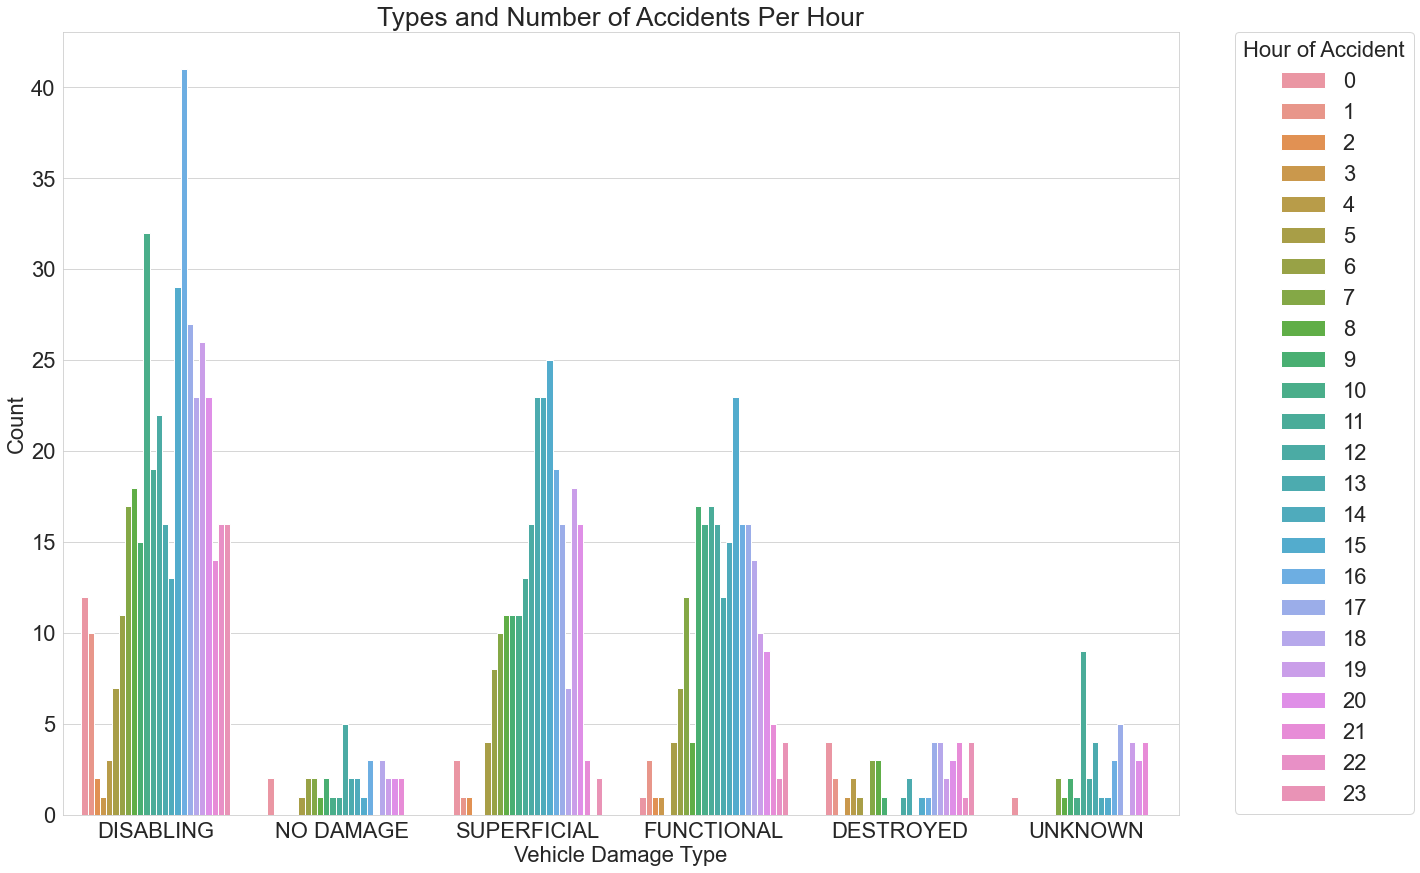

In [34]:
plt.figure(figsize=(20,14.4))
sns.countplot(x='vehicle_damage_extent', hue='hour_of_accident', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Hour of Accident")
plt.title('Types and Number of Accidents Per Hour')
plt.xlabel('Vehicle Damage Type')
plt.ylabel('Count')

If we were to compare both the these colorful graphs, we would see that the overall shapes for the columns Disabling, Superficial, and Functional are very similar in their distributions. 

Because the graph itself is hard to read and get any useful information, we will no longer explore the hours in which the accidents occured.

Lets go back to looking at some correlations with the speed limits.

## Injury Severity for each Speed Limit 

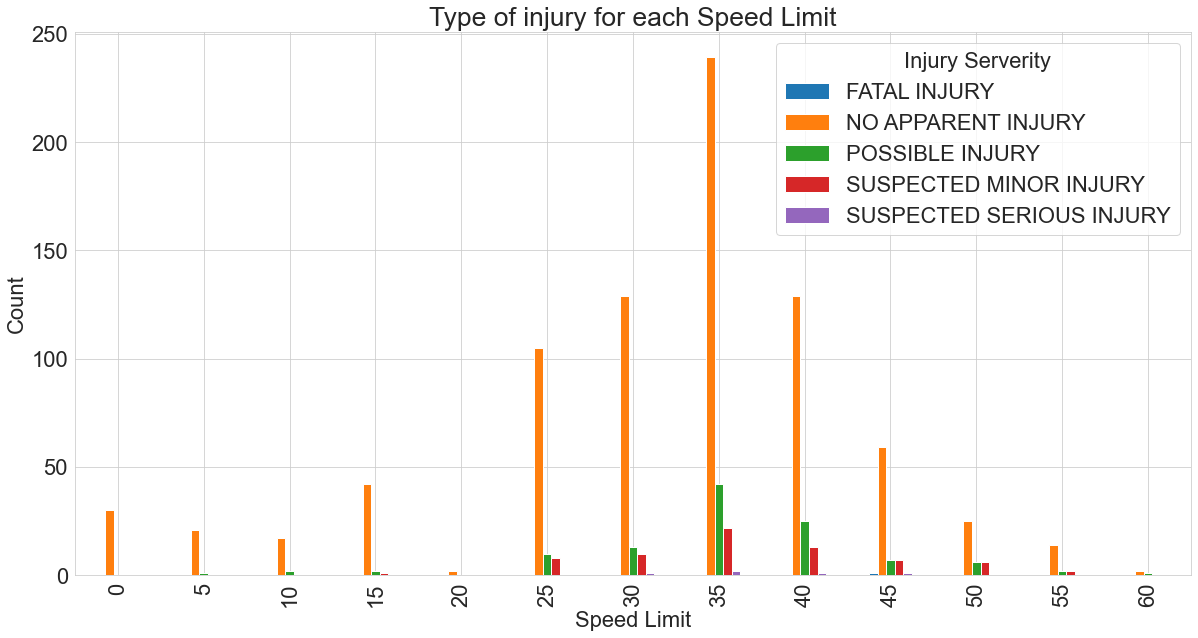

In [35]:
pd.crosstab(df['speed_limit'],df['injury_severity']).plot.bar()
plt.title('Type of injury for each Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.legend(title='Injury Serverity')

It looks like the majority of the injury severities involved in crashes do not involve any apparent injuries

### Of the people who were hurt in an accident involving a 35MPH crash, how severe were the injures?

Text(0.5, 1.0, 'Percentage of Injuries at 35 MPH')

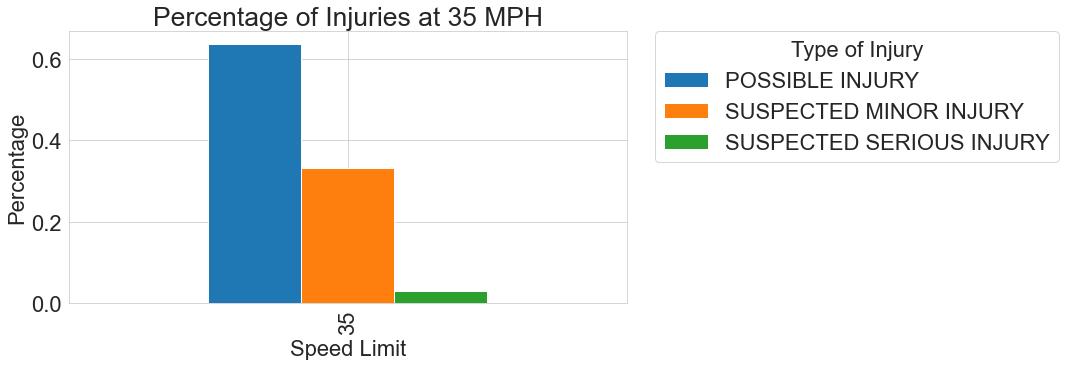

In [36]:
# Filter by people who were injured
temp_df = df[df['injury_severity'] != 'NO APPARENT INJURY']
# Filter by the speed limit of 35
temp_df = temp_df[temp_df['speed_limit'] == 35]
pd.crosstab(temp_df['speed_limit'],temp_df['injury_severity'], normalize=True).plot.bar(figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Type of Injury")
plt.xlabel('Speed Limit')
plt.ylabel('Percentage')
plt.title('Percentage of Injuries at 35 MPH')

It looks like of the people who were injured in a at 35 MPH, around 64% of them were possibly injured, around 33% has a minor injury, and around 3% had a major injury

In [37]:
temp_df['injury_severity'].value_counts(normalize=True).round(decimals=2) * 100

POSSIBLE INJURY             64.0
SUSPECTED MINOR INJURY      33.0
SUSPECTED SERIOUS INJURY     3.0
Name: injury_severity, dtype: float64

Lets finally loook at which day of the week do most accidents happen on.

## What day does most of the accidents happen on?

Text(0, 0.5, 'Count')

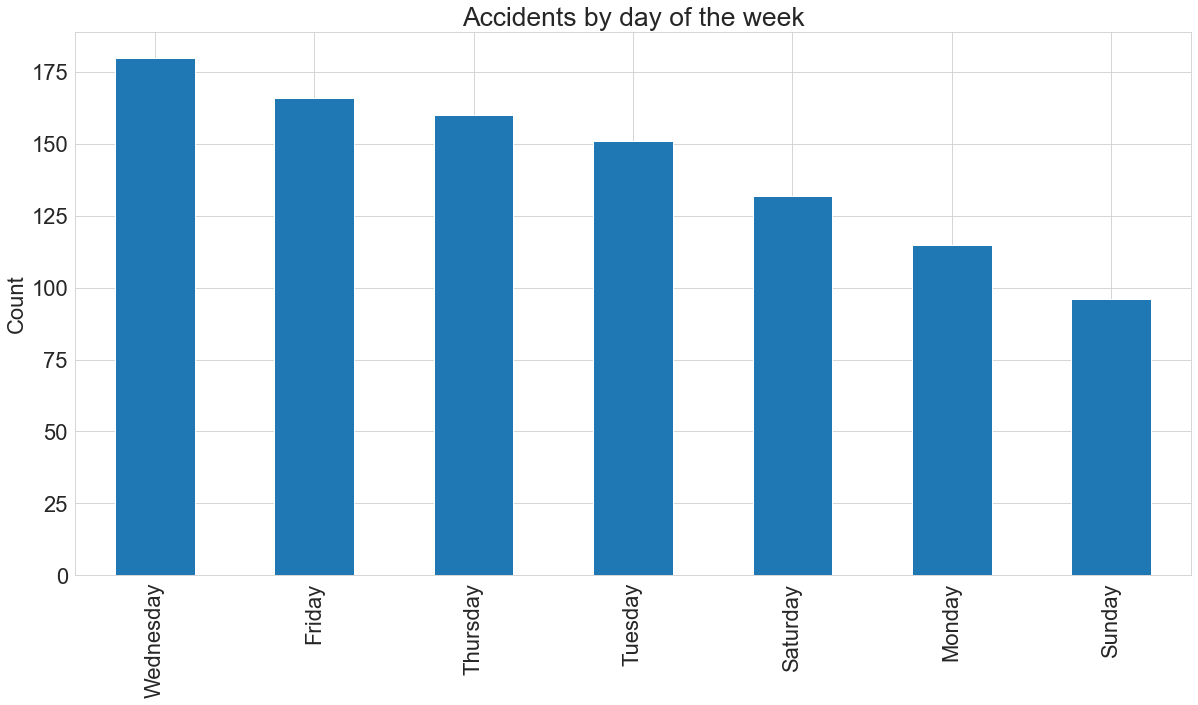

In [38]:
df['day_of_week'].value_counts().plot.bar()
plt.title('Accidents by day of the week')
plt.ylabel('Count')

We can see that most of the accidents happen on Wednesday

Now that we have explored many variables and correlations revolving around the speed limit of 35 MPH, lets try to find some conditional probabilities inspired by the data we have just observed.

# What is the probability of being injured if you are involved in an accident, given the speed limit is 35MPH and its Wednesday in Montgomery County?

For the given problem. We can use Bayes Rule and conditional probability to help us find our answer.

##### Bayes Rule = P(A|B) = P(A & B)/P(B)

We will define our variable A as the Probability of being injured

We will define our variable B as the Probability of the speed limit of 35MPH & Wednesday

If we were to substitue our proportions, we would get a formula of:

##### P(Injured | Wednesday & 35 MPH) = P(Injured & Wednesday & 35 MPH) / P(Wednesday & 35 MPH)
##### P(Injured | Wednesday & 35 MPH) = p_injured_35_mph_wednesday / p_35_mph_wednesday

*We will also assume an injury is counted as anything that is not reported as 'NO APPARENT INJURY' in the injury_severity column of our dataset

In [39]:
#P(Injured & Wednesday & 35 MPH)
p_injured_35_mph_wednesday = (((df['injury_severity'] != 'NO APPARENT INJURY') & (df['speed_limit'] == 35)) & (df['day_of_week'] == 'Wednesday')).mean()
# P(Wednesday & 35 MPH)
p_35_mph_wednesday = ((df['speed_limit'] == 35) & (df['day_of_week'] == 'Wednesday')).mean()
#P(Injured | Wednesday & 35 MPH) = P(Injured & Wednesday & 35 MPH) / P(Wednesday & 35 MPH)
p_injured_given_35_mph_wednesday = p_injured_35_mph_wednesday / p_35_mph_wednesday
# Round the answer to 2 decimals
print('{}'.format(p_injured_given_35_mph_wednesday.round(decimals=2) * 100))

19.0


From our calculations, we conclude that you have a 19% chance of being injured if you are involved in an accident, given the speed limit is 35MPH and its Wednesday in Montgomery County

# Conclusion

From the data that was gathered and presented, we learned that a large number of accidents occur at 35mph, during the daytime between 4pm-5pm and mostly on Wednesdays. Although, the crashes at that speed were not fatal, there was a significant amount of accidents that involved property damage. The majority of the crashes however did not involve any apparent injuries. We also decided to combine some of the different variables we explored into a conditional probability problem. The result of our conditional probability was shocking to find that you had a 19% of being injured, while being in an accident on Wednesday when the speed limit is 35 MPH. 

Some of the issues we faced in our exploration of this dataset were:
1. Trying to figure out which columns we would want to drop and not look into because they either had a lot of missing data or the amount of unique values within the columns that would make it hard to find anything that stood out.
2. Experimenting with all the different variables to find something that was unique. 
3. Trying to decide what graphs to use and to format our graphs to present the data in a way that showed a useful result. 